In [105]:
import random

# Helper method to generate a random 10 character alphanumeric string as user_id
def random_user_id_generator(num_rows):
    user_ids = []
    for _ in range(num_rows):
        characters = string.ascii_letters + string.digits
        user_id = ''.join(random.choice(characters) for _ in range(10))
        user_ids.append(user_id)
    return user_ids

In [106]:
import numpy as np
import pandas as pd
from faker import Faker
import string

fake = Faker()

# Generate the dummy dataset
def generate_dummy_data(num_rows):
    rng = np.random.default_rng()
    dataset = pd.DataFrame({
    "user_id": random_user_id_generator(num_rows),
    "account_creation_date": random_date_generator(num_rows),
    "gender": np.random.choice(['Male', 'Female'], num_rows),
    "count_num_transactions_last_yr":rng.poisson(20, num_rows),
    "sum_amount_spent_all_time_usd": np.round(np.random.normal(loc=1000, scale=300, size=num_rows), 0),
    "current_cash_account_balance_usd": np.round(np.random.normal(loc=500, scale=150, size=num_rows), 0),
    "current_bitcoin_account_balance_btc": np.round(np.random.normal(loc=1, scale=0.6, size=num_rows), 2),
    "current_stock_account_balance_usd": np.round(np.random.normal(loc=1000, scale=700, size=num_rows), 0),
    "cash_card_enabled": np.random.choice(['Yes', 'No'], num_rows),
    "direct_deposit_enabled": np.random.choice(['Yes', 'No'], num_rows),
    "cash_boost_used": np.random.choice(['Yes', 'No'], num_rows),
    "most_interacted_user_index": np.random.randint(0, num_rows-1, num_rows),
    "user_occupation": np.random.choice(['Engineer', 'Doctor', 'Student', 'Accountant', 'Designer', 'Developer', 'Teacher', 'Entrepreneur', 'Nurse', 'Lawyer'], num_rows),
    "location": [fake.state() for _ in range(num_rows)],
    "most_used_cash_app_feature": np.random.choice(['Boost', 'Peer to Peer Payment', 'Direct Deposit', 'Investing', 'Cash Card'], num_rows),
    })
    return dataset

# Generate 10 rows of dummy data
num_rows = 5000
df = generate_dummy_data(num_rows)

In [107]:
df.head()

,user_id,account_creation_date,gender,count_num_transactions_last_yr,sum_amount_spent_all_time_usd,current_cash_account_balance_usd,current_bitcoin_account_balance_btc,current_stock_account_balance_usd,cash_card_enabled,direct_deposit_enabled,cash_boost_used,most_interacted_user_index,user_occupation,location,most_used_cash_app_feature
0,LyuLjUo0dH,2020-04-01,Male,14,1353.0,726.0,1.09,-53.0,Yes,Yes,Yes,442,Lawyer,Wyoming,Peer to Peer Payment
1,86lAOsc1Gh,2015-07-19,Male,15,498.0,274.0,2.34,1040.0,Yes,No,Yes,842,Lawyer,Connecticut,Investing
2,YcI21zkiL1,2019-04-23,Female,16,690.0,765.0,0.47,1201.0,No,Yes,No,4698,Designer,Illinois,Cash Card
3,10zlKlUH4r,2018-11-29,Male,30,1032.0,748.0,1.17,1266.0,No,No,Yes,467,Doctor,Washington,Cash Card
4,dflMuC8Yz8,2015-10-06,Male,11,169.0,362.0,1.35,65.0,No,Yes,No,3724,Nurse,Kentucky,Boost


In [108]:
from datetime import datetime
df["account_age_yr"] = df.apply(lambda x: (datetime.now() - x["account_creation_date"]).days // 365, axis=1)

In [109]:
df.head()

,user_id,account_creation_date,gender,count_num_transactions_last_yr,sum_amount_spent_all_time_usd,current_cash_account_balance_usd,current_bitcoin_account_balance_btc,current_stock_account_balance_usd,cash_card_enabled,direct_deposit_enabled,cash_boost_used,most_interacted_user_index,user_occupation,location,most_used_cash_app_feature,account_age_yr
0,LyuLjUo0dH,2020-04-01,Male,14,1353.0,726.0,1.09,-53.0,Yes,Yes,Yes,442,Lawyer,Wyoming,Peer to Peer Payment,3
1,86lAOsc1Gh,2015-07-19,Male,15,498.0,274.0,2.34,1040.0,Yes,No,Yes,842,Lawyer,Connecticut,Investing,8
2,YcI21zkiL1,2019-04-23,Female,16,690.0,765.0,0.47,1201.0,No,Yes,No,4698,Designer,Illinois,Cash Card,4
3,10zlKlUH4r,2018-11-29,Male,30,1032.0,748.0,1.17,1266.0,No,No,Yes,467,Doctor,Washington,Cash Card,4
4,dflMuC8Yz8,2015-10-06,Male,11,169.0,362.0,1.35,65.0,No,Yes,No,3724,Nurse,Kentucky,Boost,7


In [110]:
# Convert to positive values
df['sum_amount_spent_all_time_usd'] = df['sum_amount_spent_all_time_usd'] - min(df['sum_amount_spent_all_time_usd'])
df['current_cash_account_balance_usd'] = df['current_cash_account_balance_usd'] - min(df['current_cash_account_balance_usd'])
df['current_bitcoin_account_balance_btc'] = df['current_bitcoin_account_balance_btc'] - min(df['current_bitcoin_account_balance_btc'])
df['current_stock_account_balance_usd'] = df['current_stock_account_balance_usd'] - min(df['current_stock_account_balance_usd'])

In [111]:
# Make sure all values are positive
df.loc[:, df.columns.isin(['sum_amount_spent_all_time_usd', 'current_cash_account_balance_usd', 'current_bitcoin_account_balance_btc', 'current_stock_account_balance_usd'])].lt(0).sum()

sum_amount_spent_all_time_usd          0
current_cash_account_balance_usd       0
current_bitcoin_account_balance_btc    0
current_stock_account_balance_usd      0
dtype: int64

In [112]:
df.head()

,user_id,account_creation_date,gender,count_num_transactions_last_yr,sum_amount_spent_all_time_usd,current_cash_account_balance_usd,current_bitcoin_account_balance_btc,current_stock_account_balance_usd,cash_card_enabled,direct_deposit_enabled,cash_boost_used,most_interacted_user_index,user_occupation,location,most_used_cash_app_feature,account_age_yr
0,LyuLjUo0dH,2020-04-01,Male,14,1383.0,714.0,2.27,1432.0,Yes,Yes,Yes,442,Lawyer,Wyoming,Peer to Peer Payment,3
1,86lAOsc1Gh,2015-07-19,Male,15,528.0,262.0,3.52,2525.0,Yes,No,Yes,842,Lawyer,Connecticut,Investing,8
2,YcI21zkiL1,2019-04-23,Female,16,720.0,753.0,1.65,2686.0,No,Yes,No,4698,Designer,Illinois,Cash Card,4
3,10zlKlUH4r,2018-11-29,Male,30,1062.0,736.0,2.35,2751.0,No,No,Yes,467,Doctor,Washington,Cash Card,4
4,dflMuC8Yz8,2015-10-06,Male,11,199.0,350.0,2.53,1550.0,No,Yes,No,3724,Nurse,Kentucky,Boost,7


In [113]:
# Make the most_interacter_user_index to index mutual for 10% of the cases
mi = list(df['most_interacted_user_index'])
for i in range(0, 5000):
    if i%10==0: 
        mi[mi[i]] = i
df['most_interacted_user_index'] = mi

In [114]:
df.head()

,user_id,account_creation_date,gender,count_num_transactions_last_yr,sum_amount_spent_all_time_usd,current_cash_account_balance_usd,current_bitcoin_account_balance_btc,current_stock_account_balance_usd,cash_card_enabled,direct_deposit_enabled,cash_boost_used,most_interacted_user_index,user_occupation,location,most_used_cash_app_feature,account_age_yr
0,LyuLjUo0dH,2020-04-01,Male,14,1383.0,714.0,2.27,1432.0,Yes,Yes,Yes,442,Lawyer,Wyoming,Peer to Peer Payment,3
1,86lAOsc1Gh,2015-07-19,Male,15,528.0,262.0,3.52,2525.0,Yes,No,Yes,842,Lawyer,Connecticut,Investing,8
2,YcI21zkiL1,2019-04-23,Female,16,720.0,753.0,1.65,2686.0,No,Yes,No,4698,Designer,Illinois,Cash Card,4
3,10zlKlUH4r,2018-11-29,Male,30,1062.0,736.0,2.35,2751.0,No,No,Yes,467,Doctor,Washington,Cash Card,4
4,dflMuC8Yz8,2015-10-06,Male,11,199.0,350.0,2.53,1550.0,No,Yes,No,3724,Nurse,Kentucky,Boost,7


In [115]:
df.iloc[2161]

user_id                                          iUtlQT69kT
account_creation_date                   2018-12-05 00:00:00
gender                                                 Male
count_num_transactions_last_yr                           19
sum_amount_spent_all_time_usd                        1371.0
current_cash_account_balance_usd                      635.0
current_bitcoin_account_balance_btc                    2.08
current_stock_account_balance_usd                    2336.0
cash_card_enabled                                        No
direct_deposit_enabled                                   No
cash_boost_used                                         Yes
most_interacted_user_index                             1112
user_occupation                                      Lawyer
location                                           Missouri
most_used_cash_app_feature             Peer to Peer Payment
account_age_yr                                            4
Name: 2161, dtype: object

In [116]:
# Map most_interacted_user_index to most_interacted_user_id
li = []
for val in list(df['most_interacted_user_index']):
    uid = df.iloc[val]['user_id']
    li.append(uid)
df['most_interacted_user_id'] = li
df.drop(columns=['most_interacted_user_index'])
df.head()

,user_id,account_creation_date,gender,count_num_transactions_last_yr,sum_amount_spent_all_time_usd,current_cash_account_balance_usd,current_bitcoin_account_balance_btc,current_stock_account_balance_usd,cash_card_enabled,direct_deposit_enabled,cash_boost_used,most_interacted_user_index,user_occupation,location,most_used_cash_app_feature,account_age_yr,most_interacted_user_id
0,LyuLjUo0dH,2020-04-01,Male,14,1383.0,714.0,2.27,1432.0,Yes,Yes,Yes,442,Lawyer,Wyoming,Peer to Peer Payment,3,dt8BG7TNjO
1,86lAOsc1Gh,2015-07-19,Male,15,528.0,262.0,3.52,2525.0,Yes,No,Yes,842,Lawyer,Connecticut,Investing,8,3WfkGmY1HF
2,YcI21zkiL1,2019-04-23,Female,16,720.0,753.0,1.65,2686.0,No,Yes,No,4698,Designer,Illinois,Cash Card,4,TSFnHGhvcb
3,10zlKlUH4r,2018-11-29,Male,30,1062.0,736.0,2.35,2751.0,No,No,Yes,467,Doctor,Washington,Cash Card,4,vH6YkrHISj
4,dflMuC8Yz8,2015-10-06,Male,11,199.0,350.0,2.53,1550.0,No,Yes,No,3724,Nurse,Kentucky,Boost,7,zTbIUEjCJJ


In [117]:
df.to_parquet("cash_friends.parquet")

In [118]:
df.head(50)

,user_id,account_creation_date,gender,count_num_transactions_last_yr,sum_amount_spent_all_time_usd,current_cash_account_balance_usd,current_bitcoin_account_balance_btc,current_stock_account_balance_usd,cash_card_enabled,direct_deposit_enabled,cash_boost_used,most_interacted_user_index,user_occupation,location,most_used_cash_app_feature,account_age_yr,most_interacted_user_id
0,LyuLjUo0dH,2020-04-01,Male,14,1383.0,714.0,2.27,1432.0,Yes,Yes,Yes,442,Lawyer,Wyoming,Peer to Peer Payment,3,dt8BG7TNjO
1,86lAOsc1Gh,2015-07-19,Male,15,528.0,262.0,3.52,2525.0,Yes,No,Yes,842,Lawyer,Connecticut,Investing,8,3WfkGmY1HF
2,YcI21zkiL1,2019-04-23,Female,16,720.0,753.0,1.65,2686.0,No,Yes,No,4698,Designer,Illinois,Cash Card,4,TSFnHGhvcb
3,10zlKlUH4r,2018-11-29,Male,30,1062.0,736.0,2.35,2751.0,No,No,Yes,467,Doctor,Washington,Cash Card,4,vH6YkrHISj
4,dflMuC8Yz8,2015-10-06,Male,11,199.0,350.0,2.53,1550.0,No,Yes,No,3724,Nurse,Kentucky,Boost,7,zTbIUEjCJJ
5,bWNBxNu0lX,2014-02-11,Female,15,1056.0,421.0,2.38,3815.0,Yes,No,No,420,Entrepreneur,Connecticut,Peer to Peer Payment,9,Q23Ny302JF
6,NxpH11IbhE,2021-06-28,Female,18,999.0,340.0,4.20,2353.0,No,No,Yes,4371,Developer,Indiana,Investing,2,C3cqYRYEMo
7,8Mx6xJHz8J,2019-07-26,Male,17,257.0,659.0,1.57,3416.0,No,No,No,66,Nurse,South Carolina,Direct Deposit,4,53xb7jbq7U
8,v8IHUru8GP,2021-04-27,Male,21,1058.0,683.0,2.96,3610.0,Yes,Yes,No,3614,Student,Minnesota,Boost,2,0p4Cyx5vYq
9,4oXU9zSpQC,2018-04-18,Male,25,1592.0,517.0,1.36,1741.0,Yes,Yes,Yes,4033,Accountant,Florida,Peer to Peer Payment,5,5oAc86OX5j


<AxesSubplot:ylabel='Frequency'>

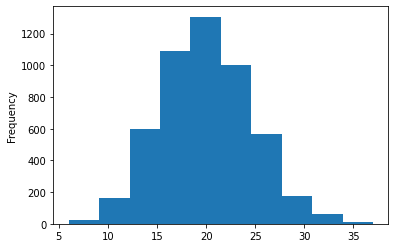

In [119]:
df['count_num_transactions_last_yr'].plot.hist()

In [120]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Pandas Profiling Report")

In [121]:
profile.to_file("your_report.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]